# Laboratorio 4
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 2. Análisis de series de tiempo


**2.1.1** La señal corresponde a datos del la tasa de cambio representativa del mercado (TRM), la cual mide la cantidad
de pesos colombianos por un dólar de los Estados Unidos. El archivo historical TRM.csv contiene 6 columnas
con la siguiente información:

In [6]:
import pandas as pd
def extract_currency(x):
  if isinstance(x, str):
    return(x.replace('%', '').replace(',', ''))
  return(x)

df = pd.read_csv('historical_TRM.csv', delimiter=',')
#Para analizar su contenido
print(df.head())
senal=np.array(df['Precio'].apply(extract_currency).astype('float'))


        Fecha    Precio  Apertura    Maximo    Minimo  Cambio
0  01/01/2023  4,859.00  4,848.00  5,008.88  4,818.11   0.25%
1  12/25/2022  4,847.00  4,729.00  4,851.90  4,727.21   2.51%
2  12/18/2022  4,728.33  4,790.26  4,790.63  4,727.79  -1.19%
3  12/11/2022  4,785.51  4,809.85  4,861.00  4,757.65  -0.43%
4  12/04/2022  4,806.00  4,771.54  4,843.88  4,765.20   0.78%


**2.1.2** Utilice la columna Fecha y calcule el periodo de muestreo para esta serie de tiempo. Expréselo en días, semanas y años.


In [7]:
senal_tiempo=np.array(df['Fecha'])
# Invertir la serie de tiempo
senal_tiempo1 = np.flip(senal_tiempo)
senal1 = np.flip(senal)
periodo_muestreo = pd.infer_freq(senal_tiempo1)
print(senal_tiempo[:5])
print(periodo_muestreo)

['01/01/2023' '12/25/2022' '12/18/2022' '12/11/2022' '12/04/2022']
W-SUN


El periodo de muestreo es semanal

2.1.3. Grafique la señal Precio en función del tiempo y presente un análisis sobre la misma

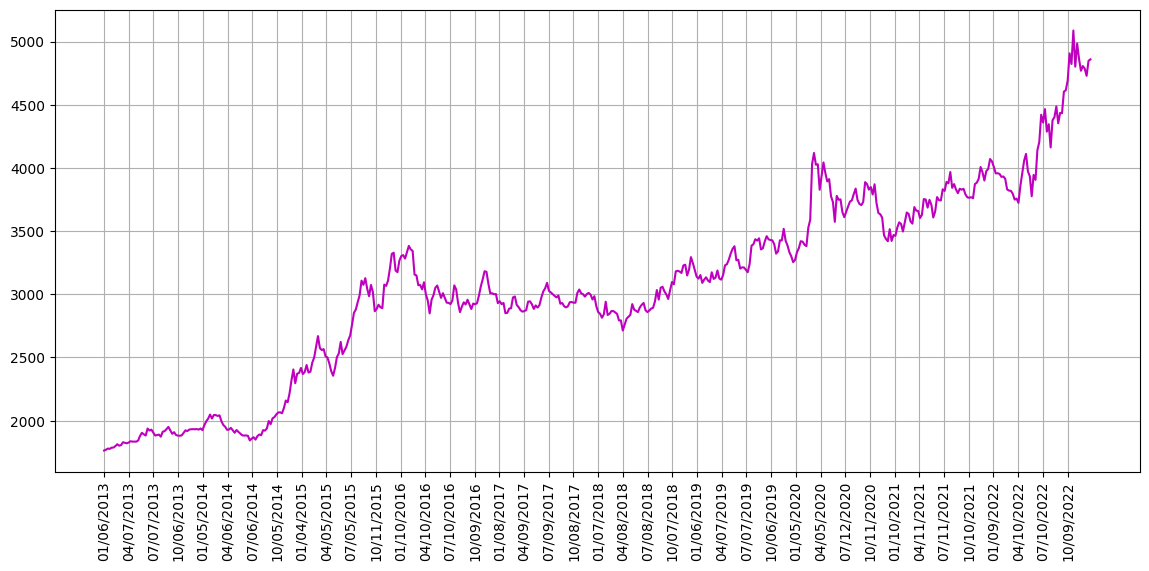

In [72]:
plt.figure(figsize=(14,6))
plt.plot(senal_tiempo1,senal1,'m')
plt.grid()
plt.tick_params(axis='x',rotation=90)
plt.xticks(list(np.arange(0,len(senal_tiempo),len(senal_tiempo)/40)))
plt.show()

En la grafica se puede observar como  a medida que pasan los años el precio del dolar a aumentado significativamente, esto se debe a varios factores como la inflacion mundial,o como se puede ver en el 2020 hubo un pico que corresponde a la pandemia generada por el covid-19


2.1.4. Grafique la señal Cambio en función del tiempo y presente un análisis sobre la misma.

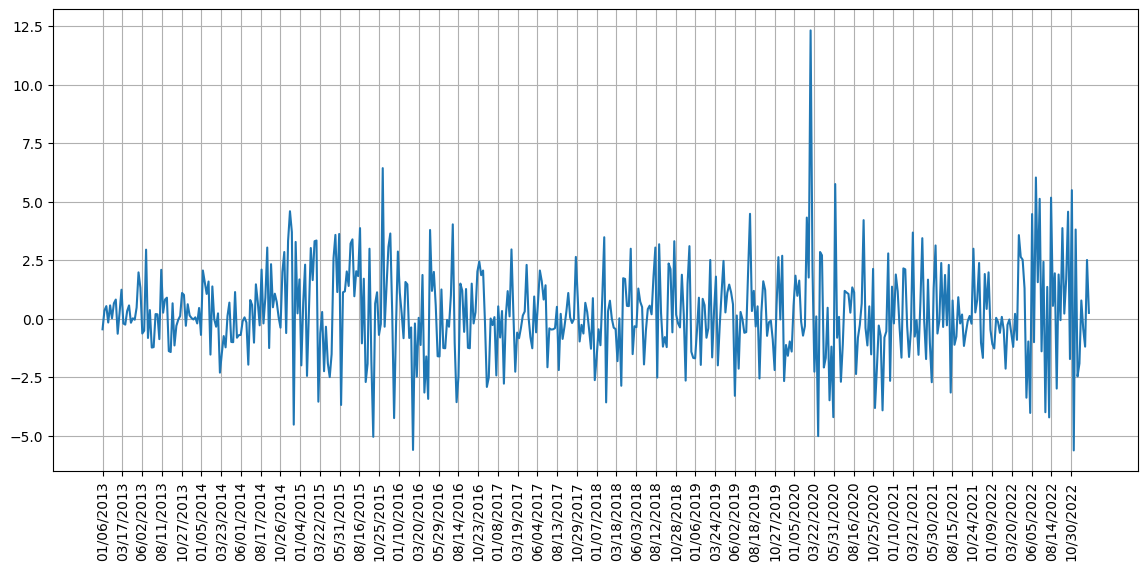

In [10]:
senal_cambio=np.array(df['Cambio'].apply(extract_currency).astype('float'))
senal_cambio=np.flip(senal_cambio)
plt.figure(figsize=(14,6))
plt.plot(senal_tiempo1,senal_cambio)
plt.grid()
plt.tick_params(axis='x',rotation=90)
plt.xticks(list(np.arange(0,len(senal_tiempo),len(senal_tiempo)/50)))
plt.show()


En al grafica se puede observar como los picos mas altos de taza de cambio corresponde a la epoca de panndemia que fuie cuando el dolar se disapro mas

5. Calcule la autocorrelación de la señal Precio y la correlacion con la señal Cambio. ¿Que puede concluir
del resultado?

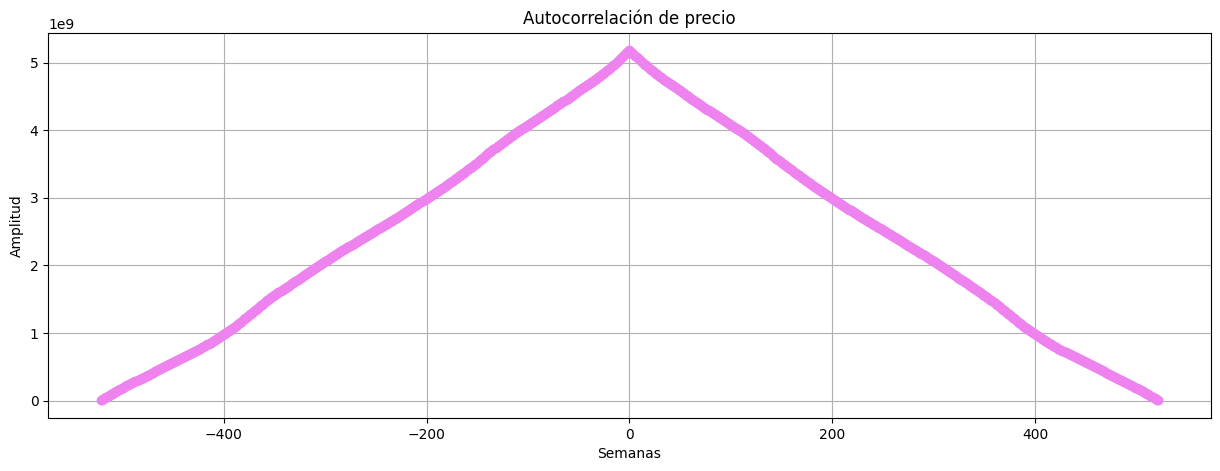

In [51]:

Rxx=np.correlate(senal,senal , mode='full')

tau=np.arange(-len(senal)+1,len(senal),1) # vector de retraso

#Gráfica
plt.figure(figsize=(15,5))
plt.plot(tau,Rxx,"o",color = 'violet')
plt.title("Autocorrelación de precio")
plt.xlabel("Semanas",)
plt.ylabel("Amplitud")
plt.grid()
plt.show()

En la autocorrelacion se puede ver como anque conozcamos un dato, no se peude predecir el comportamiento del precio del dolar en las siguientes semanas

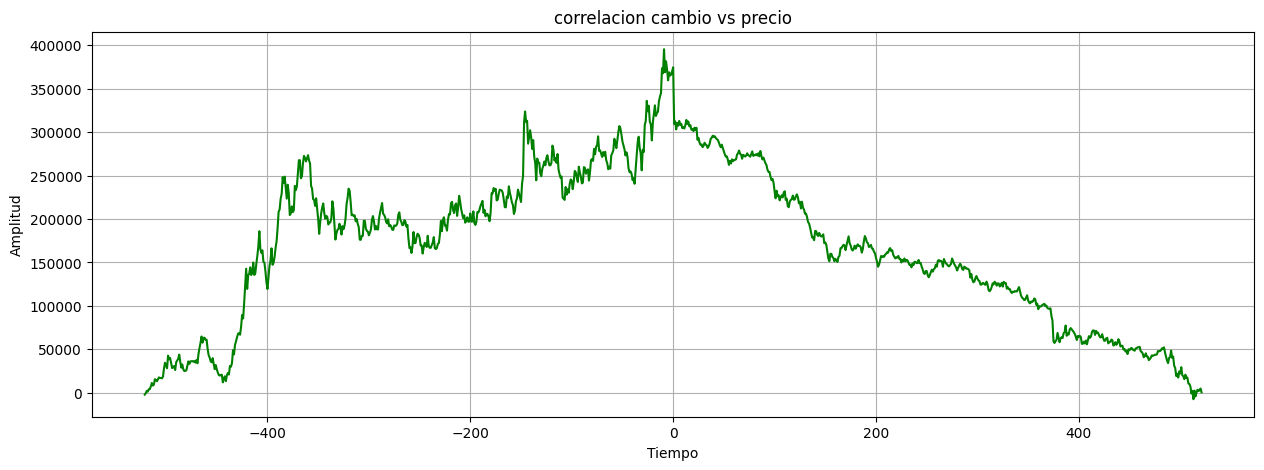

In [63]:
senal_cambio1 = np.flip(senal_cambio)
Rxy=np.correlate(senal,senal_cambio1, mode='full')
plt.figure(figsize=(15,5))
plt.plot(tau,Rxy,'g')
plt.title("correlacion cambio vs precio")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

#Investigue para que se utiliza el test Dickey-Fuller,
El test Dickey-Fuller es una prueba estadística utilizada para determinar si una serie temporal es estacionaria o no estacionaria. Es ampliamente utilizado en econometría y análisis de series temporales, y su objetivo principal es evaluar si una serie temporal tiene una raíz unitaria. Una serie temporal con una raíz unitaria es típicamente no estacionaria, lo que significa que sus propiedades estadísticas varían con el tiempo y no se pueden predecir de manera constante. En contraste, una serie temporal estacionaria tiene propiedades estadísticas constantes a lo largo del tiempo y es más fácil de modelar y predecir.

In [65]:
!pip install statsmodels


In [69]:
from statsmodels.tsa.stattools import adfuller
resultado_senal = adfuller(senal)
valor_p_senal = resultado_senal[1]

# Realiza el test ADF para la señal de cambio
resultado_senal_cambio = adfuller(senal_cambio)
valor_p_senal_cambio = resultado_senal_cambio[1]

# Imprime los resultados
print("Para la señal precio, el valor de p es:", valor_p_senal)
print("Para la señal de cambio, el valor de p es:", valor_p_senal_cambio)

Para la señal, el valor de p es: 0.5106840912269115
Para la señal de cambio, el valor de p es: 3.389582867374799e-25


El valor de la señal precio es no estacionaria,lo que significa que no se puede predecir su comportamiento,mientras que  la señal de cambio si se puede predecir su comportamiento respecto al precio

#3. Filtro de media móvil


3.1
Diseñee un filtro de media móvil con 3 diferentes valores de L en el rango de 3 a 30, calcule la respuesta de la señal Precio (obtenida en el punto 2.1.3) ante dicho filtro y grafique la señal resultante usando subplots (se puede utilizar el vector de tiempos generado anteriormente). Tip: Para calcular la salida se usa la convolución:

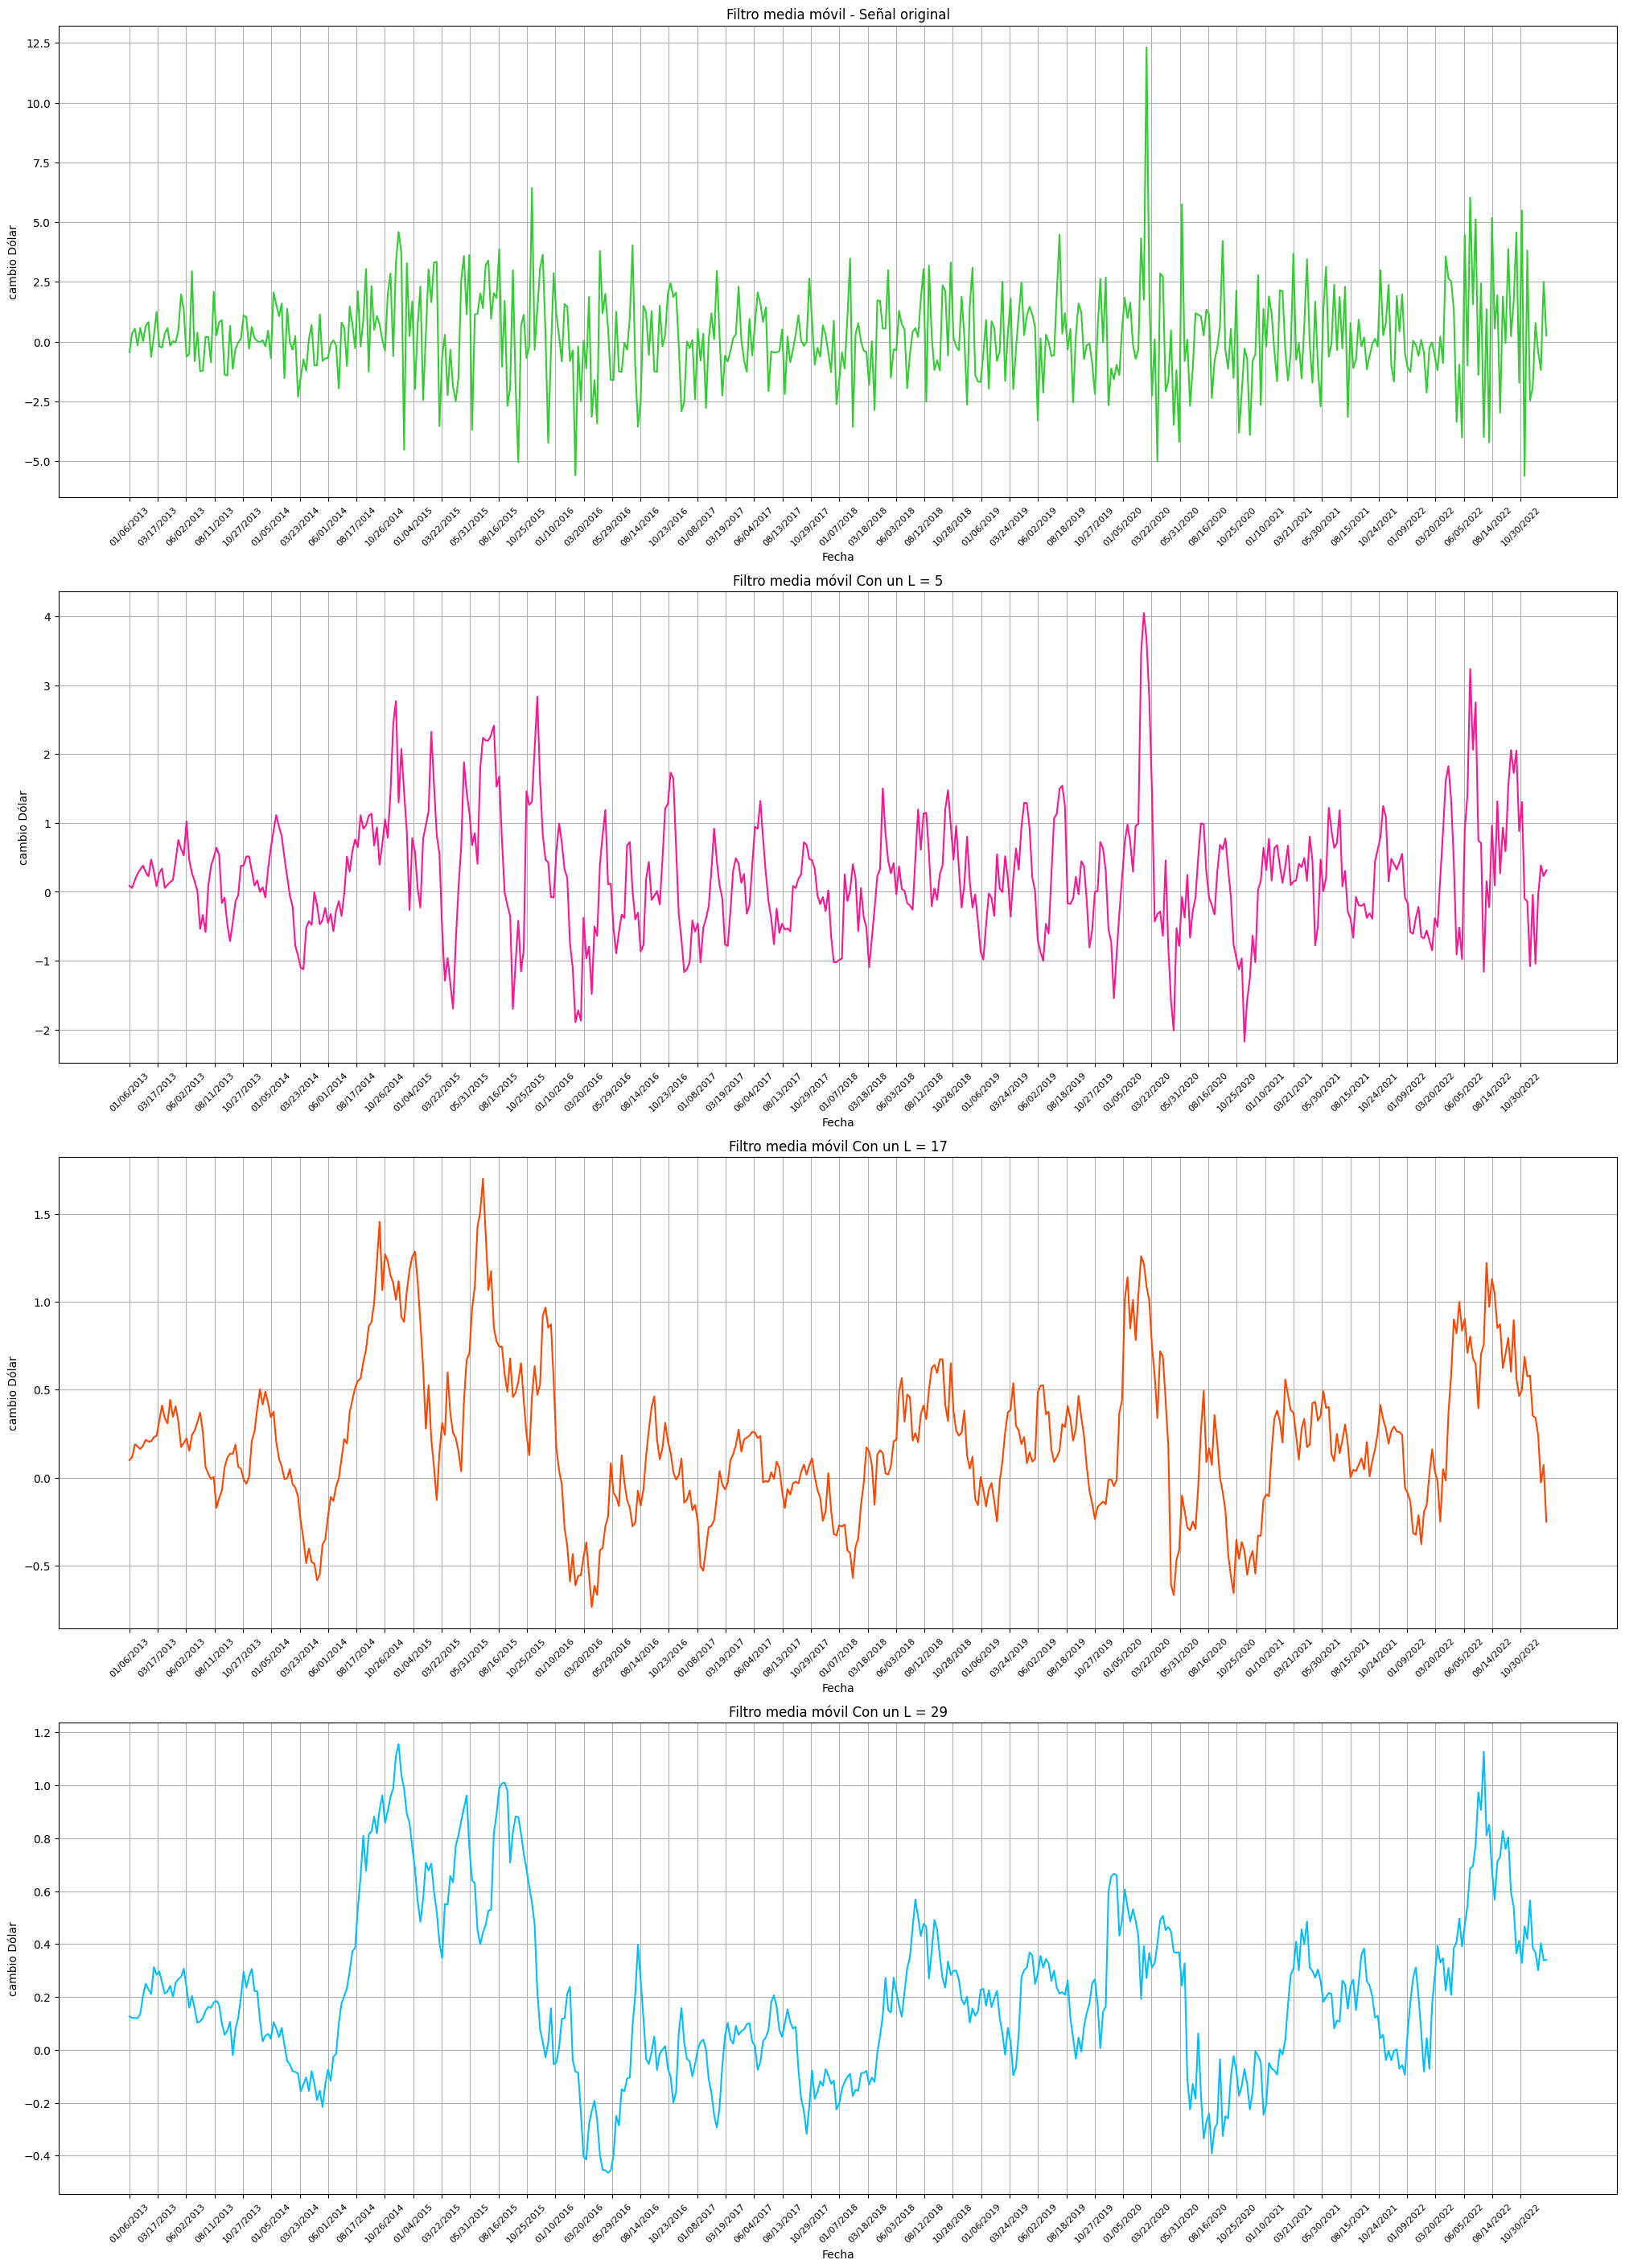

In [85]:
t = senal_tiempo1
signalp=senal_cambio
signal =[]
rangoL = [] #Espaciado de a 100
for L in range (5, 71, 12):
    coefs = np.ones(L)/float(L)
    senal_smooth=np.convolve(signalp, coefs, mode='same')
    signal.append(senal_smooth) #Se almacena el valor de la convolucion en una lista auxiliar.
    rangoL.append(L)

plt.figure(figsize=(25,35))
plt.subplot(4, 1, 1)
plt.plot(t, signalp,color = 'limegreen')
plt.title('Filtro media móvil - Señal original')
plt.xlabel('Fecha')
plt.ylabel('cambio Dólar')
plt.grid()
plt.tick_params(axis='x', rotation=45,  labelsize=8);
plt.xticks(list(np.arange(0, len(t), len(t)/50)))


plt.subplot(4, 1, 2)
plt.plot(t, signal[0],color = 'deeppink')
plt.title('Filtro media móvil Con un L =' f" {rangoL[0]}")
plt.xlabel('Fecha')
plt.ylabel('cambio Dólar')
plt.grid()
plt.tick_params(axis='x', rotation=45,  labelsize=8);
plt.xticks(list(np.arange(0, len(t), len(t)/50)));

plt.subplot(4, 1, 3)
plt.plot(t, signal[1],color = 'orangered')
plt.title('Filtro media móvil Con un L =' f" {rangoL[1]}")
plt.xlabel('Fecha')
plt.ylabel('cambio Dólar')
plt.grid()
plt.tick_params(axis='x', rotation=45, labelsize=8);
plt.xticks(list(np.arange(0, len(t), len(t)/50)));

plt.subplot(4, 1, 4)
plt.plot(t, signal[2],color = 'deepskyblue')
plt.title('Filtro media móvil Con un L =' f" {rangoL[2]}")
plt.xlabel('Fecha')
plt.ylabel('cambio Dólar')
plt.grid()
plt.tick_params(axis='x', rotation=45, labelsize=8);
plt.xticks(list(np.arange(0, len(t), len(t)/50)));



Entre mas bajito sea el valor de L,mas facil es analizar la señal

2. Importe las funciones del archivo ztrans.py incluido con esta gu ́ıa (aseg ́urese de ubicarlo en la misma
carpeta del Notebook), las cuales calculan la respuesta en frecuencia y fase, respuesta al escal ́on, y al
impulso
Tip: Para hacerlo utilice el siguiente comando:

In [86]:
from ztrans import *

3. Utilice la función impz para graficar y analizar la respuesta al impulso y al escalon del filtro de media
móvil. ¿Qué me indica la respuesta al impulso? Compare los resultados con L = 6 y L = 25. Tip: para
usarla utilice el siguiente comando:

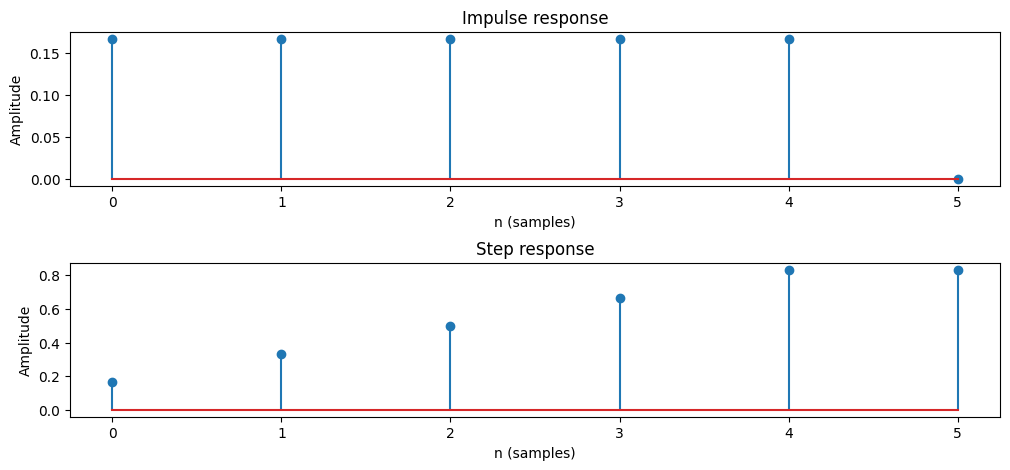

In [87]:
L = 6
num = np.zeros(L)
num[0] = 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
impz(num, den)

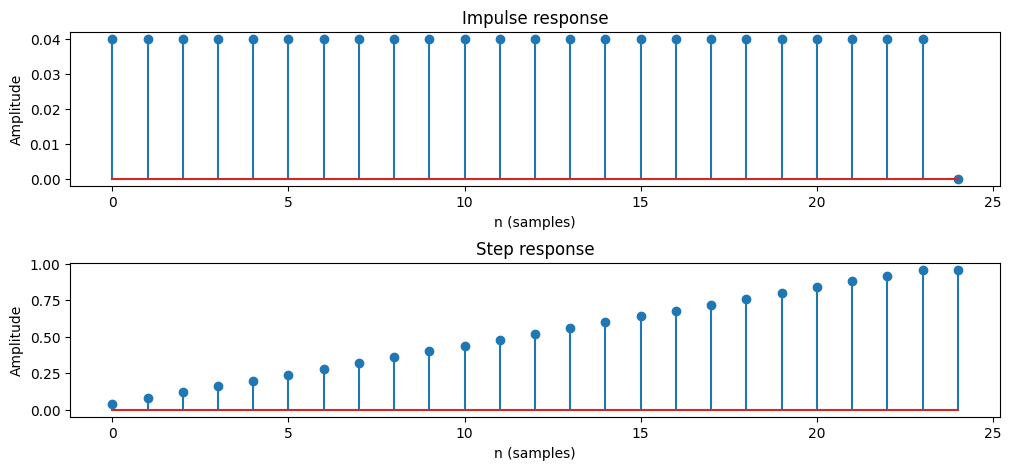

In [88]:
L = 25
num = np.zeros(L)
num[0] = 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1
impz(num, den)

 **¿Qué me indica la respuesta al impulso? Compare los resultados con L = 6 y L = 25.**

La respuesta al impulso indica que tan estable es un sistema, para este su forma en escalón muestra como se va estabilizando al tener mayor numero de muestras, también se observa que al tener un mayor orden del filtro (L = 25) se obtiene una respuesta ante el impulso de mayor duración pero menor amplitud. Al comparar L=6 con L=25 se observa que al tener un filtro de orden mayor se toman mas muestras.

4. Utilice la función mfreqz para graficar y analizar la respuesta en frecuencia del filtro de media móvil.
¿Qué tipo de filtro es? ¿Como es su respuesta en fase? Compare los resultados con L = 6 y L = 25.
Tip: para usarla utilice el siguiente comando:

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


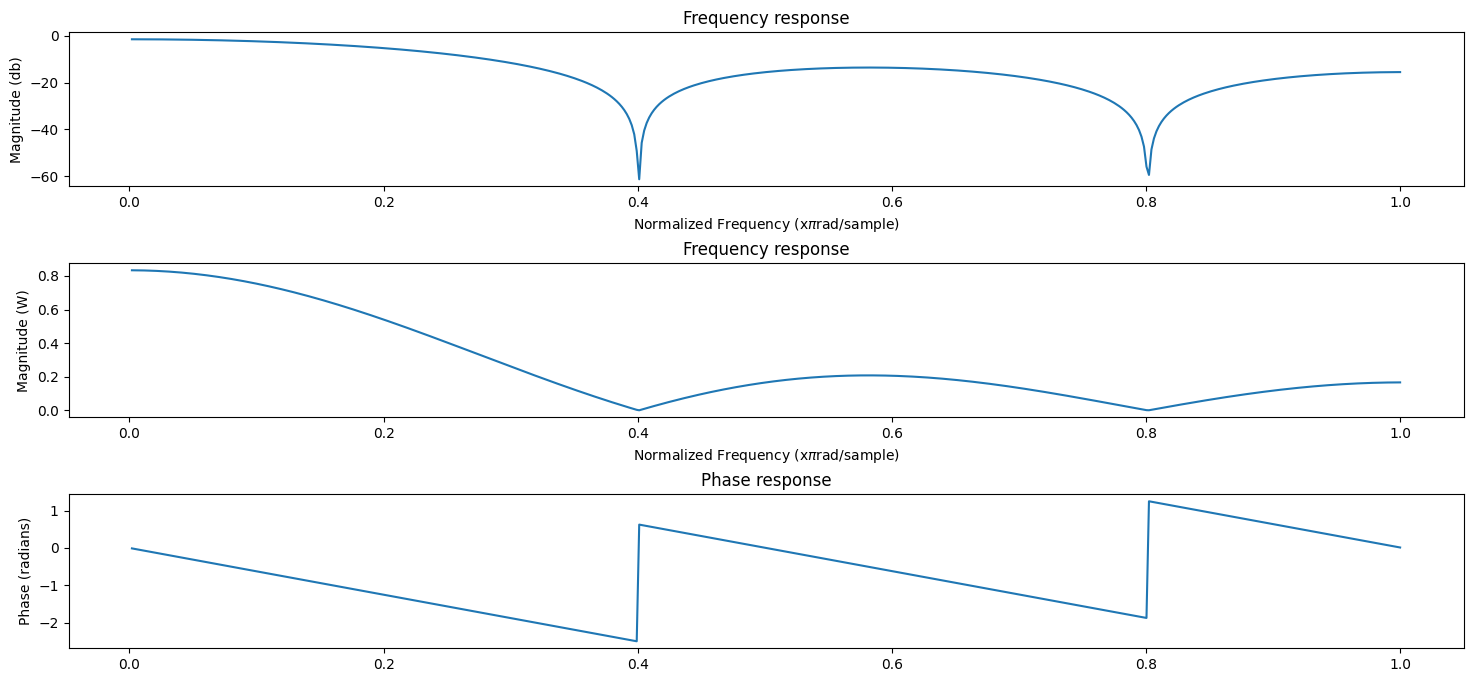

In [89]:
L = 6
num = np.zeros(L)
num[0] = 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1

mfreqz(num, den)

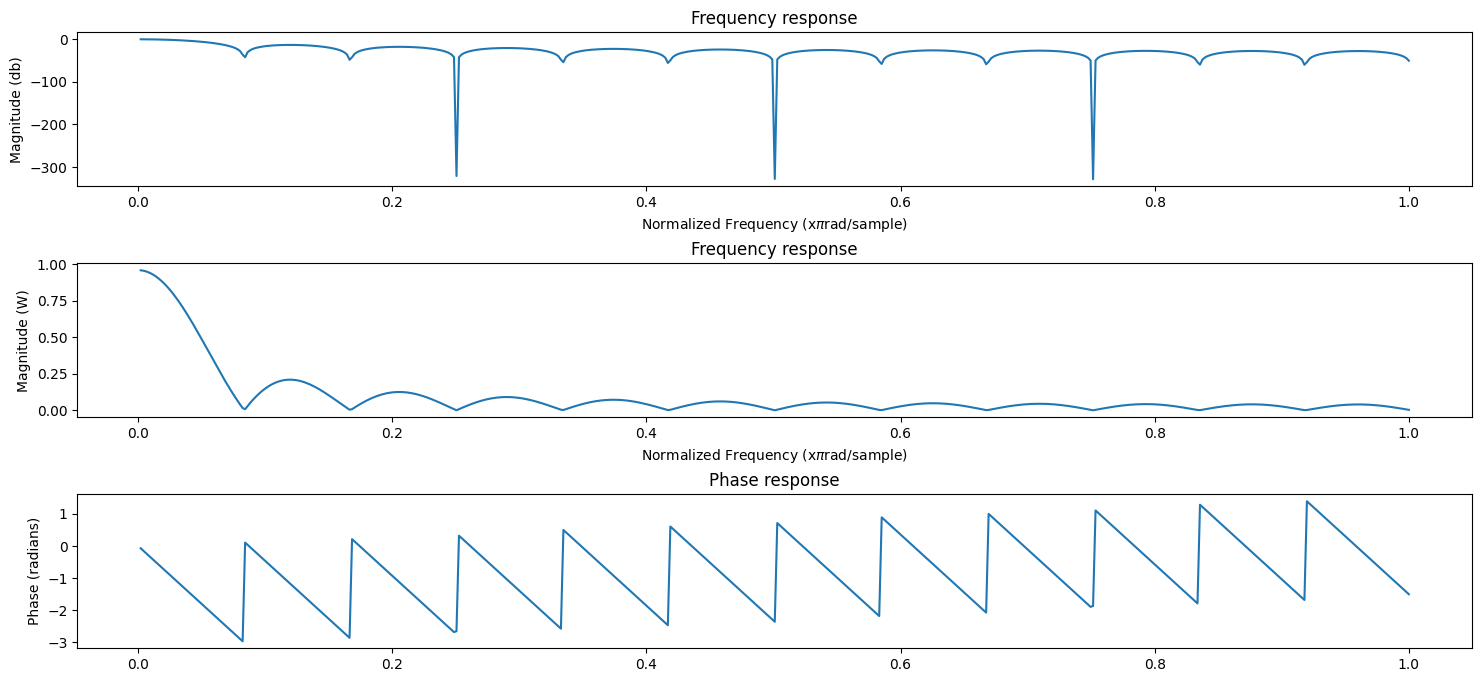

In [90]:
L =25
num = np.zeros(L)
num[0] = 1.0/L
num[-1] = -1.0/L
den = np.zeros(L)
den[0] = 1
den[1] = -1

mfreqz(num, den)

El filtro es de tipo pasabajas, se observa que con un orden mayor del filtro empieza a disminuir la amplitud de frecuencias altas. Con L=6 no se aprecia mucho pero con L=25 ya se nota como disminuye la amplitud al tener una frecuencia alta, en cuanto a la fase se tiene un comportamiento lienal

#4. Filtro de primera diferencia

1. Mediante la función de convolución utilizada anteriormente, calcule la derivada de la señal con el filtro
de primera diferencia, grafique y analice brevemente la señal resultante. ¿Qué me indica esta señal?

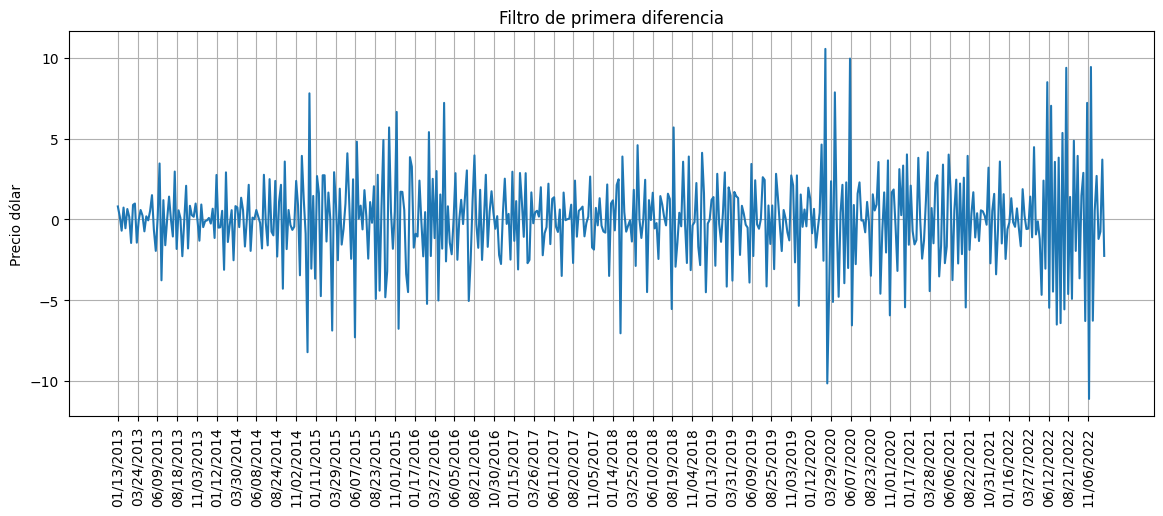

In [97]:
difcoefs=[1, -1]
p_diferencia=np.convolve(senal_cambio, difcoefs, mode='same')
plt.figure(figsize=(14,5))
plt.plot(senal_tiempo1[1:],p_diferencia[1:])
plt.tick_params(axis='x',rotation=90)
plt.xticks(list(np.arange(0,len(senal_tiempo),len(senal_tiempo)/50)))
plt.title('Filtro de primera diferencia')
plt.ylabel('Precio dólar')
plt.grid()
plt.show()

Al derivar la señal, esta muestra  los datos uno respecto al anterior y permite ver el comportamiento al pasar el tiempo

2. Utilice la funcion impz para graficar y analizar la respuesta al impulso y al escalon del filtro de primera
diferencia. ¿Qué me indica la respuesta al impulso?

<Figure size 1600x500 with 0 Axes>

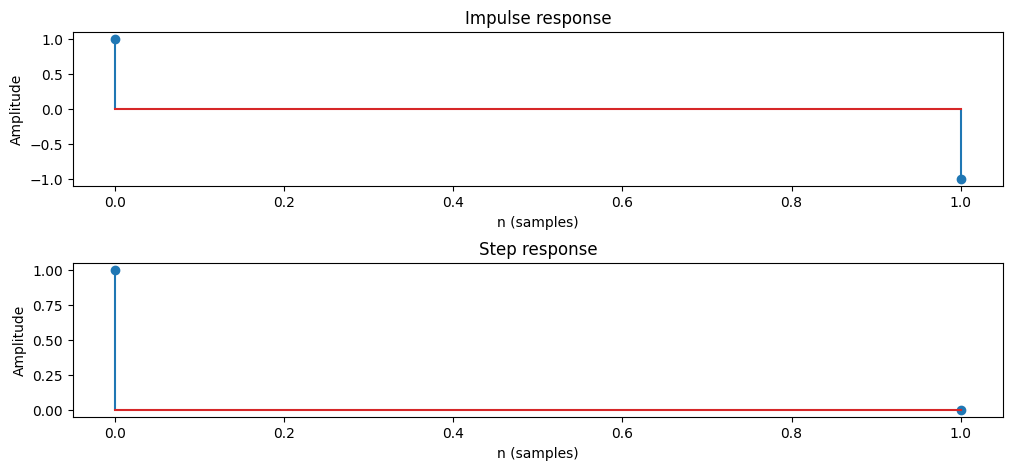

In [98]:
difcoefs=[1, -1]
num=[1, -1]
den=[1, 0]

plt.figure(figsize=(16,5))
impz(num,den)

que berraquera

3. Utilice la funcion mfreqz para graficar y analizar la respuesta en frecuencia del filtro de primera diferencia. ¿Qu ́e tipo de filtro es? ¿Como es la respuesta de fase?

/content/ztrans.py:9: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * log10 (abs(h))


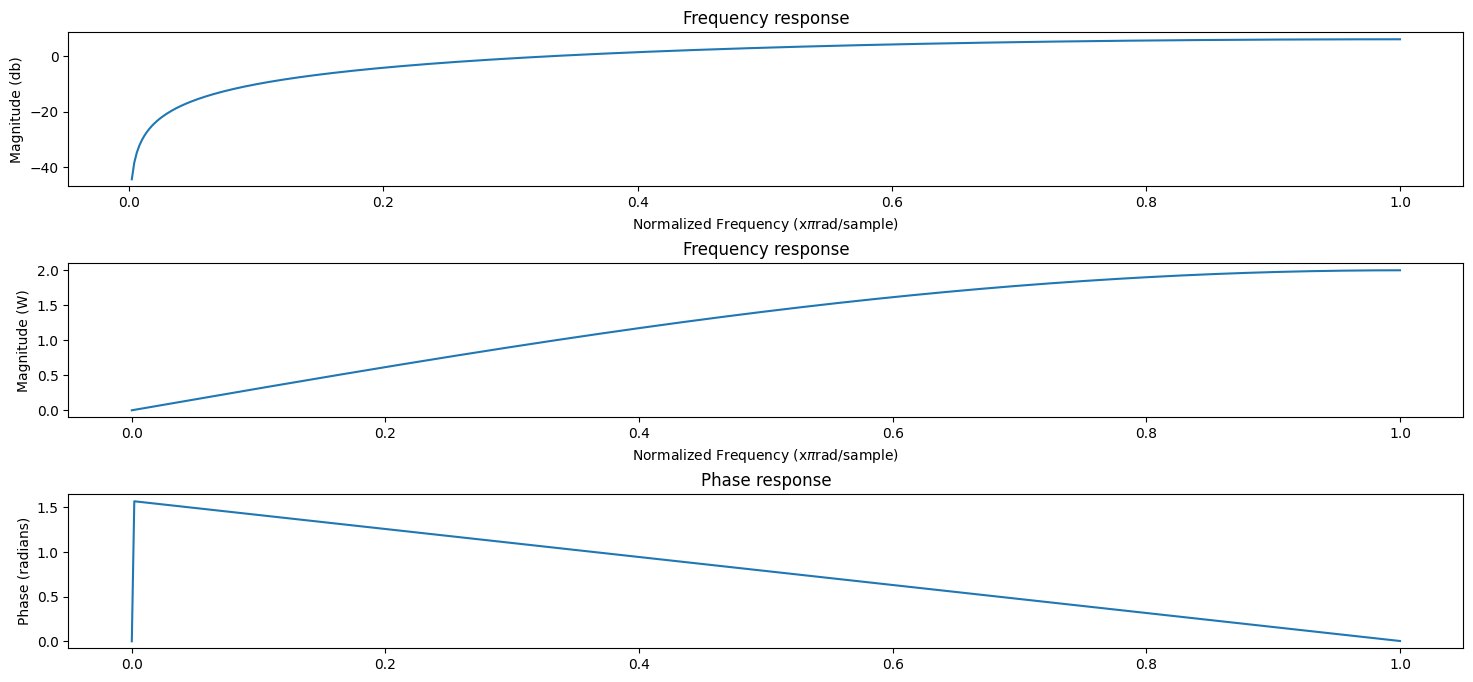

In [99]:
mfreqz(num, den)

es un filtro pasa altas

## Conclusiones
Los filtros se utilizan para eliminar ruido y ver mejor la señal, el de media móvil permite encontrar tendencias y el de primera diferencia los cambios bruscos de la señal

A un menor orden del filtro de media móvil se tiene una señal más parecida a la original,sin perder informacion por lo que es más recomendable utilizar un orden menor teniendo en cuenta lo que se busca observar en la señal


La respuesta al impulso permite ver la estabilidad del filtro y a mayor número de muestras se puede observar que la amplitud decrece.
